In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.dataset as ds
import joblib

from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [2]:
cols = [
    'Airline','Origin','Dest','CRSDepTime',
    'Month','DayOfWeek','Distance','DistanceGroup',
    'DepDel15','DepDelayMinutes',
    'ArrDel15','ArrDelayMinutes','Cancelled','Diverted'
]

df = pd.read_parquet('./data/2021_delay_ds.parquet', columns=cols)

In [3]:
airline_delay_rate = df.groupby("Airline")["DepDel15"].mean().to_dict()

airline_delay_rate


{'Air Wisconsin Airlines Corp': 0.16764815313754924,
 'Alaska Airlines Inc.': 0.14696088610114422,
 'Allegiant Air': 0.26475442744345806,
 'American Airlines Inc.': 0.18065830995183946,
 'Capital Cargo International': 0.11190036994384599,
 'Comair Inc.': 0.1286960308064933,
 'Commutair Aka Champlain Enterprises, Inc.': 0.20981150379282934,
 'Delta Air Lines Inc.': 0.1172869936183045,
 'Empire Airlines Inc.': 0.10714285714285714,
 'Endeavor Air Inc.': 0.0794972157362601,
 'Envoy Air': 0.1374443179321228,
 'Frontier Airlines Inc.': 0.218179398849742,
 'GoJet Airlines, LLC d/b/a United Express': 0.16945181407848947,
 'Hawaiian Airlines Inc.': 0.087970411158841,
 'Horizon Air': 0.11679877409174245,
 'JetBlue Airways': 0.26254748849750903,
 'Mesa Airlines Inc.': 0.19021497405485543,
 'Republic Airlines': 0.11788432941779975,
 'SkyWest Airlines Inc.': 0.1450914116421673,
 'Southwest Airlines Co.': 0.26860629155258664,
 'Spirit Air Lines': 0.20262574283007492,
 'United Air Lines Inc.': 0.1668

In [4]:
origin_delay_rate = df.groupby("Origin")["DepDel15"].mean().to_dict()


In [5]:
df["Route"] = df["Origin"] + "_" + df["Dest"]


In [6]:
route_delay_rate = df.groupby("Route")["DepDel15"].mean().to_dict()


In [7]:
df["DepHour"] = df["CRSDepTime"] // 100
hour_delay_rate = df.groupby("DepHour")["DepDel15"].mean().to_dict()


In [8]:
joblib.dump(airline_delay_rate, "airline_delay_rate.pkl")
joblib.dump(origin_delay_rate, "origin_delay_rate.pkl")
joblib.dump(route_delay_rate, "route_delay_rate.pkl")
joblib.dump(hour_delay_rate, "hour_delay_rate.pkl")


['hour_delay_rate.pkl']

In [8]:
airlines = df['Origin'].unique()

print(airlines.tolist())


['SGU', 'PHX', 'MHT', 'DFW', 'ORD', 'PSP', 'LBB', 'FWA', 'DRO', 'LAX', 'SFO', 'JLN', 'SAF', 'ASE', 'HRL', 'DTW', 'GJT', 'SLC', 'FSM', 'FLG', 'GNV', 'ROW', 'SBN', 'MKE', 'DEN', 'OKC', 'YUM', 'BNA', 'BMI', 'EUG', 'SHV', 'IAH', 'MDT', 'EGE', 'TVC', 'GRR', 'IND', 'PIT', 'GRB', 'TRI', 'BUR', 'LFT', 'MFR', 'FAT', 'RDM', 'BIS', 'BRO', 'DSM', 'TLH', 'GSO', 'SBP', 'MTJ', 'BIL', 'SJT', 'MAF', 'BFL', 'MFE', 'ONT', 'COS', 'FAR', 'CID', 'LGB', 'ABQ', 'TUS', 'FSD', 'GRK', 'SYR', 'AMA', 'BTR', 'MSP', 'BHM', 'RNO', 'SEA', 'MCI', 'PDX', 'PSC', 'MSN', 'STL', 'BZN', 'GFK', 'SUN', 'SMF', 'BDL', 'SJC', 'FCA', 'BOI', 'JAC', 'LAS', 'OMA', 'GEG', 'IDA', 'GTF', 'DCA', 'OAK', 'MSO', 'RAP', 'DLH', 'AUS', 'CLE', 'HIB', 'LWS', 'CPR', 'SNA', 'CLT', 'PHL', 'EWR', 'IAD', 'CMH', 'EKO', 'SAT', 'IMT', 'HLN', 'INL', 'PIH', 'TUL', 'TWF', 'MQT', 'ESC', 'RHI', 'LSE', 'ABR', 'BJI', 'CDC', 'MEM', 'CHS', 'LAR', 'EAR', 'ATY', 'RST', 'CGI', 'SBA', 'TYS', 'ATL', 'ICT', 'LGA', 'RSW', 'AVL', 'SAV', 'PAE', 'CMX', 'EAU', 'DEC', 'RDD'

In [4]:
df.shape

(6311871, 14)

In [38]:
df[df['DepDel15']==1].head()

,Airline,Origin,Dest,CRSDepTime,Month,DayOfWeek,Distance,DistanceGroup,DepDel15,DepDelayMinutes,ArrDel15,ArrDelayMinutes,Cancelled,Diverted
36,SkyWest Airlines Inc.,FSM,DFW,617,3,3,227.0,1,1.0,22.0,0.0,14.0,False,False
51,SkyWest Airlines Inc.,DFW,FLG,2045,3,3,853.0,4,1.0,148.0,1.0,105.0,False,False
59,SkyWest Airlines Inc.,DFW,ASE,840,3,3,701.0,3,1.0,18.0,0.0,4.0,False,False
62,SkyWest Airlines Inc.,PHX,IAH,2005,3,3,1009.0,5,1.0,35.0,0.0,1.0,False,False
66,SkyWest Airlines Inc.,PHX,SLC,1843,3,3,507.0,3,1.0,109.0,1.0,89.0,False,False


In [4]:
df.describe()

,CRSDepTime,Month,DayOfWeek,Distance,DistanceGroup,DepDel15,DepDelayMinutes,ArrDel15,ArrDelayMinutes
count,6.311871e+06,6.311871e+06,6.311871e+06,6.311871e+06,6.311871e+06,6.203458e+06,6.203458e+06,6.185870e+06,6.185870e+06
mean,1.323953e+03,6.969905e+00,4.013676e+00,7.955762e+02,3.653994e+00,1.731723e-01,1.276132e+01,1.726611e-01,1.252928e+01
std,4.741972e+02,3.300914e+00,2.006264e+00,5.832931e+02,2.281563e+00,3.783962e-01,4.736319e+01,3.779540e-01,4.674770e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,3.100000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.200000e+02,4.000000e+00,2.000000e+00,3.700000e+02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.315000e+03,7.000000e+00,4.000000e+00,6.460000e+02,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.723000e+03,1.000000e+01,6.000000e+00,1.033000e+03,5.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00
max,2.359000e+03,1.200000e+01,7.000000e+00,5.812000e+03,1.100000e+01,1.000000e+00,3.095000e+03,1.000000e+00,3.089000e+03


In [ ]:
df.isnull().sum().sort_values(ascending=False)

ArrDel15           126001
ArrDelayMinutes    126001
DepDel15           108413
DepDelayMinutes    108413
Airline                 0
Origin                  0
DayOfWeek               0
Month                   0
CRSDepTime              0
Dest                    0
Distance                0
DistanceGroup           0
Cancelled               0
Diverted                0
dtype: int64

In [6]:
df[df.isnull().all(axis=1)]
all_nan_rows = df.isnull().all(axis=1).sum()
print(all_nan_rows)


0


In [7]:
df.isnull().sum().sort_values(ascending=False).head(20)

ArrDel15           126001
ArrDelayMinutes    126001
DepDel15           108413
DepDelayMinutes    108413
Airline                 0
Origin                  0
DayOfWeek               0
Month                   0
CRSDepTime              0
Dest                    0
Distance                0
DistanceGroup           0
Cancelled               0
Diverted                0
dtype: int64

In [8]:
df[['Cancelled','Diverted']].value_counts()

Cancelled  Diverted
False      False       6185871
True       False        111018
False      True          14982
Name: count, dtype: int64

# Tasks 
- 4 predictions 
    - Classification
        1. ArrivalDelay -> Binary classification 
            - Will the flight reach the destination late ?
        2. DepartureDelay -> Binary Classification
            - Will the flight take off late ? 
    - Regression
        1. ArrivalDelay
        2. DepartureDelay


## TASK 1 : DepartureDelay (Binary Classification)
### Does the flight takes off late ?

In [4]:
# Remove rows where the target departure delay 15 is missing (null) as label is missing 
df_departed = df[df['DepDel15'].notna()].copy()

df_departed.shape

(6203458, 14)

In [10]:
df_departed[df_departed['DepDel15']==1].shape

(1074267, 14)

In [11]:
df_departed[df_departed['DepDel15']!=1].shape

(5129191, 14)

#### Imbalanced Dataset 
Delayed (1):     1,074,267   (~17%)  
Not delayed (0): 5,129,191   (~83%)  
Total:           6,203,458


In [12]:
df_sample, _ = train_test_split(
    df_departed,
    train_size=200000,
    stratify=df_departed['DepDel15'],
    random_state=42
)

df_sample['DepDel15'].value_counts(normalize=True)

DepDel15
0.0    0.82683
1.0    0.17317
Name: proportion, dtype: float64

Feaure Engineering : Converted Hours, time to useful features

In [24]:
df_sample['DepHour'] = df_sample['CRSDepTime'] // 100

df_sample['DepHour_sin'] = np.sin(2 * np.pi * df_sample['DepHour'] / 24)
df_sample['DepHour_cos'] = np.cos(2 * np.pi * df_sample['DepHour'] / 24)

In [25]:
categorical_cols = [
    'Airline',
    'Origin',
    'Dest'
]

numeric_cols = [
    'Month',
    'DayOfWeek',
    'Distance',
    'DistanceGroup',
    'DepHour_sin',
    'DepHour_cos'
]

features = categorical_cols + numeric_cols

X = df_sample[features]
y = df_sample['DepDel15']


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [27]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

In [32]:
# logistic_regression_model = LogisticRegression()
logistic_regression_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    n_jobs=-1,
)

In [33]:
logistic_regression_model.fit(X_train_encoded,y_train)

d:\Coding\ML\Projects\Flight Delay Prediction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)
d:\Coding\ML\Projects\Flight Delay Prediction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [39]:
logistic_regression_model_pred = logistic_regression_model.predict(X_test_encoded)

In [40]:
print(classification_report(y_test, logistic_regression_model_pred))
print(confusion_matrix(y_test, logistic_regression_model_pred))
print("Accuracy:", accuracy_score(y_test, logistic_regression_model_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.64      0.74     33073
         1.0       0.27      0.63      0.38      6927

    accuracy                           0.64     40000
   macro avg       0.58      0.63      0.56     40000
weighted avg       0.78      0.64      0.68     40000

[[21056 12017]
 [ 2554  4373]]
Accuracy: 0.635725


In [ ]:
'''
This is initial performance without class unbalanced and 100 iterations 
                   precision   recall    f1-score support
         0.0       0.83        1.00      0.91     33073
         1.0       0.63        0.01      0.01      6927

    accuracy                           0.83     40000
   macro avg       0.73      0.50      0.46     40000
weighted avg       0.79      0.83      0.75     40000

                    predicted 0     predicted 1
actual 0            [[33049         24]
actual 1            [ 6886          41]]
model has more false positives in 7k delayed flights it is predicting correctly only 41 VERY BAD
Accuracy: 0.82725


AFTER Class Baanced and 1000 iterations
                   precision    recall    f1-score   support
         0.0       0.89         0.64      0.74       33073
         1.0       0.27         0.63      0.38       6927

    accuracy                           0.64     40000
   macro avg       0.58      0.63      0.56     40000
weighted avg       0.78      0.64      0.68     40000

[[21056 12017]
 [ 2554  4373]]
Accuracy: 0.635725
'''

Random Forest

In [41]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)

In [42]:
rf_model.fit(X_train_encoded, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",15
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [43]:
rf_pred = rf_model.predict(X_test_encoded)

print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.69      0.78     33073
         1.0       0.29      0.60      0.39      6927

    accuracy                           0.68     40000
   macro avg       0.59      0.64      0.59     40000
weighted avg       0.79      0.68      0.71     40000

[[22966 10107]
 [ 2804  4123]]
Accuracy: 0.677225


In [ ]:
''' 
Random Forest 
                  precision    recall    f1-score   support
         0.0       0.89        0.69      0.78       33073
         1.0       0.29        0.60      0.39       6927

    accuracy                           0.68     40000
   macro avg       0.59      0.64      0.59     40000
weighted avg       0.79      0.68      0.71     40000

[[22966 10107]
 [ 2804  4123]]
Accuracy: 0.677225







'''

XG Boost

In [46]:
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    n_jobs=-1,
    random_state=42,
    tree_method="hist"
)

In [47]:
xgb_model.fit(X_train_encoded, y_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes f

In [48]:
xgb_pred = xgb_model.predict(X_test_encoded)

print(classification_report(y_test, xgb_pred))
print(confusion_matrix(y_test, xgb_pred))
print("Accuracy:", accuracy_score(y_test, xgb_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.70      0.79     33073
         1.0       0.30      0.62      0.41      6927

    accuracy                           0.69     40000
   macro avg       0.60      0.66      0.60     40000
weighted avg       0.79      0.69      0.72     40000

[[23179  9894]
 [ 2634  4293]]
Accuracy: 0.6868


In [52]:
'''
XG Boost initial run
                 precision   recall  f1-score   support
         0.0       0.90      0.70      0.79     33073
         1.0       0.30      0.62      0.41      6927

    accuracy                           0.69     40000
   macro avg       0.60      0.66      0.60     40000
weighted avg       0.79      0.69      0.72     40000

[[23179  9894]
 [ 2634  4293]]
Accuracy: 0.6868
'''

'\nXG Boost initial run\n                 precision   recall  f1-score   support\n         0.0       0.90      0.70      0.79     33073\n         1.0       0.30      0.62      0.41      6927\n\n    accuracy                           0.69     40000\n   macro avg       0.60      0.66      0.60     40000\nweighted avg       0.79      0.69      0.72     40000\n\n[[23179  9894]\n [ 2634  4293]]\nAccuracy: 0.6868\n'

Using RandomizedSearchCV to improve f1

In [50]:
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb_base = XGBClassifier(
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    n_jobs=-1,
    random_state=42,
    tree_method="hist"
)

param_dist = {
    'n_estimators': [150, 200, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.2],
    'min_child_weight': [1, 3, 5]
}


In [51]:
random_search = RandomizedSearchCV(
    xgb_base,
    param_distributions=param_dist,
    n_iter=10,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_encoded, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","XGBClassifier...ree=None, ...)"
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'learning_rate': [0.05, 0.1, ...], 'max_depth': [4, 6, ...], 'min_child_weight': [1, 3, ...], 'n_estimators': [150, 200, ...]}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",10
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'f1'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... vers

In [53]:
print(random_search.best_params_)

{'n_estimators': 150, 'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.05}


In [54]:
best_xgb = random_search.best_estimator_

pred = best_xgb.predict(X_test_encoded)

print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))
print("Accuracy:", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.90      0.71      0.79     33073
         1.0       0.31      0.62      0.41      6927

    accuracy                           0.69     40000
   macro avg       0.60      0.66      0.60     40000
weighted avg       0.80      0.69      0.73     40000

[[23419  9654]
 [ 2666  4261]]
Accuracy: 0.692


In [ ]:
''' 
Trying to optimize thersold
current (default) prob > 0.5 ----> class 1 (delayed)
'''

In [60]:
probs = best_xgb.predict_proba(X_test_encoded)[:, 1]

thresholds = np.arange(0.1, 0.9, 0.05)

best_threshold = 0.5
best_f1 = 0

for t in thresholds:
    preds = (probs >= t).astype(int)
    f1 = f1_score(y_test, preds)
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print("Best threshold:", best_threshold)
print("Best F1:", best_f1)

Best threshold: 0.5500000000000002
Best F1: 0.4115066932497864


In [62]:
final_preds = (probs >= best_threshold).astype(int)

print(classification_report(y_test, final_preds))


              precision    recall  f1-score   support

         0.0       0.89      0.79      0.83     33073
         1.0       0.34      0.52      0.41      6927

    accuracy                           0.74     40000
   macro avg       0.61      0.65      0.62     40000
weighted avg       0.79      0.74      0.76     40000



Adding Delay rates

In [63]:
# Combine X_train and y_train temporarily
train_temp = X_train.copy()
train_temp["DepDel15"] = y_train


In [64]:
airline_delay_rate = train_temp.groupby("Airline")["DepDel15"].mean()

X_train["AirlineDelayRate"] = X_train["Airline"].map(airline_delay_rate)
X_test["AirlineDelayRate"] = X_test["Airline"].map(airline_delay_rate)


In [65]:
origin_delay_rate = train_temp.groupby("Origin")["DepDel15"].mean()

X_train["OriginDelayRate"] = X_train["Origin"].map(origin_delay_rate)
X_test["OriginDelayRate"] = X_test["Origin"].map(origin_delay_rate)


In [66]:
train_temp["Route"] = train_temp["Origin"] + "_" + train_temp["Dest"]

X_train["Route"] = X_train["Origin"] + "_" + X_train["Dest"]
X_test["Route"] = X_test["Origin"] + "_" + X_test["Dest"]

route_delay_rate = train_temp.groupby("Route")["DepDel15"].mean()

X_train["RouteDelayRate"] = X_train["Route"].map(route_delay_rate)
X_test["RouteDelayRate"] = X_test["Route"].map(route_delay_rate)


In [71]:
X_train["DepHour"] = (
    np.arctan2(X_train["DepHour_sin"], X_train["DepHour_cos"]) * 24 / (2*np.pi)
) % 24

X_test["DepHour"] = (
    np.arctan2(X_test["DepHour_sin"], X_test["DepHour_cos"]) * 24 / (2*np.pi)
) % 24

# Convert to integer hour
X_train["DepHour"] = X_train["DepHour"].astype(int)
X_test["DepHour"] = X_test["DepHour"].astype(int)

train_temp["DepHour"] = X_train["DepHour"]

hour_delay_rate = train_temp.groupby("DepHour")["DepDel15"].mean()

X_train["HourDelayRate"] = X_train["DepHour"].map(hour_delay_rate)
X_test["HourDelayRate"] = X_test["DepHour"].map(hour_delay_rate)



In [75]:
global_mean = y_train.mean()

for col in ["AirlineDelayRate", "OriginDelayRate", "RouteDelayRate", "HourDelayRate"]:
    X_train[col] = X_train[col].fillna(global_mean)
    X_test[col] = X_test[col].fillna(global_mean)


In [76]:
numeric_cols.extend([
    "AirlineDelayRate",
    "OriginDelayRate",
    "RouteDelayRate",
    "HourDelayRate"
])


In [77]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

best_xgb.fit(X_train_encoded, y_train)

pred = best_xgb.predict(X_test_encoded)

print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))
print("Accuracy:", accuracy_score(y_test, pred))


              precision    recall  f1-score   support

         0.0       0.89      0.71      0.79     33073
         1.0       0.29      0.58      0.39      6927

    accuracy                           0.68     40000
   macro avg       0.59      0.64      0.59     40000
weighted avg       0.78      0.68      0.72     40000

[[23344  9729]
 [ 2933  3994]]
Accuracy: 0.68345


In [79]:
probs = best_xgb.predict_proba(X_test_encoded)[:, 1]

thresholds = np.arange(0.1, 0.9, 0.01)

best_threshold = 0.5
best_f1 = 0

for t in thresholds:
    preds = (probs >= t).astype(int)
    f1 = f1_score(y_test, preds)
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print("Best threshold:", best_threshold)
print("Best F1:", best_f1)



Best threshold: 0.5699999999999997
Best F1: 0.3936063936063936


In [80]:
final_preds = (probs >= best_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, final_preds))
print(confusion_matrix(y_test, final_preds))
print("Accuracy:", accuracy_score(y_test, final_preds))


              precision    recall  f1-score   support

         0.0       0.88      0.80      0.84     33073
         1.0       0.33      0.48      0.39      6927

    accuracy                           0.74     40000
   macro avg       0.61      0.64      0.61     40000
weighted avg       0.79      0.74      0.76     40000

[[26332  6741]
 [ 3578  3349]]
Accuracy: 0.742025


## Analysis

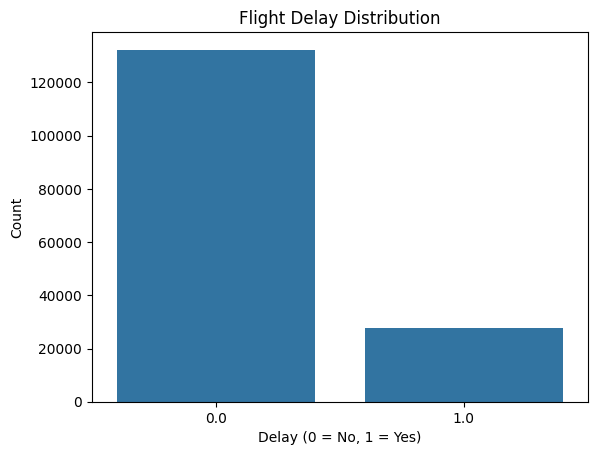

In [84]:
sns.countplot(x=y_train)
plt.title("Flight Delay Distribution")
plt.xlabel("Delay (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Highly imbalanced dataset

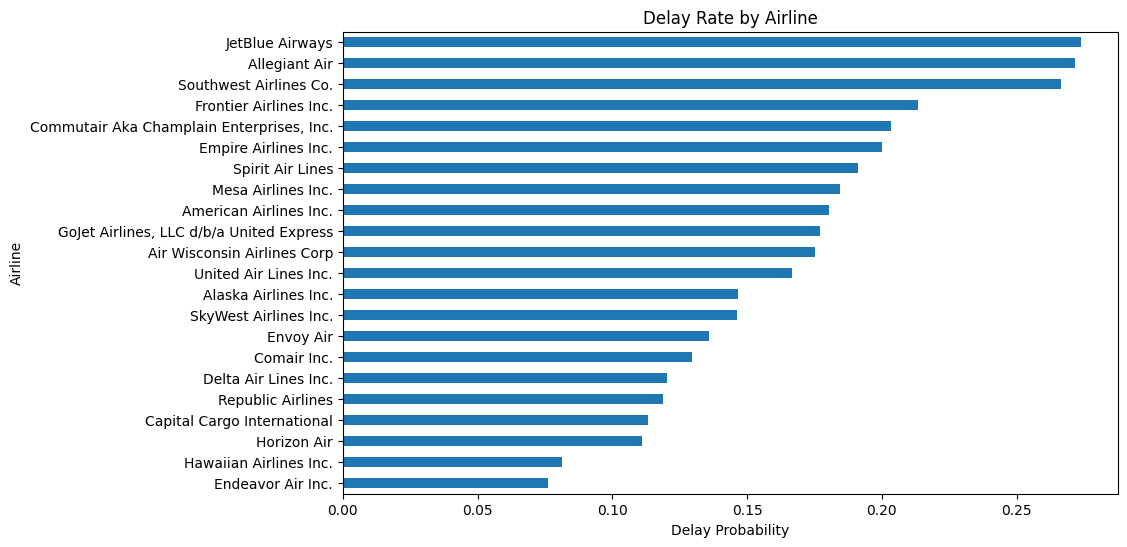

In [85]:
# Delay rate by Airline
airline_delay = df_sample.groupby("Airline")["DepDel15"].mean().sort_values()

plt.figure(figsize=(10,6))
airline_delay.plot(kind="barh")
plt.title("Delay Rate by Airline")
plt.xlabel("Delay Probability")
plt.show()


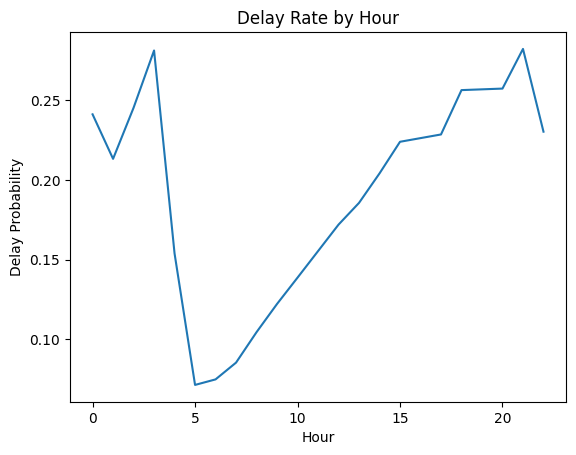

In [ ]:
# Delay rate by departure hour
df_sample["DepHour"] = (np.arctan2(df_sample["DepHour_sin"], df_sample["DepHour_cos"]) * 24 / (2*np.pi)) % 24
df_sample["DepHour"] = df_sample["DepHour"].astype(int)

hour_delay = df_sample.groupby("DepHour")["DepDel15"].mean()

hour_delay.plot()
plt.title("Delay Rate by Hour")
plt.xlabel("Hour")
plt.ylabel("Delay Probability")
plt.show()


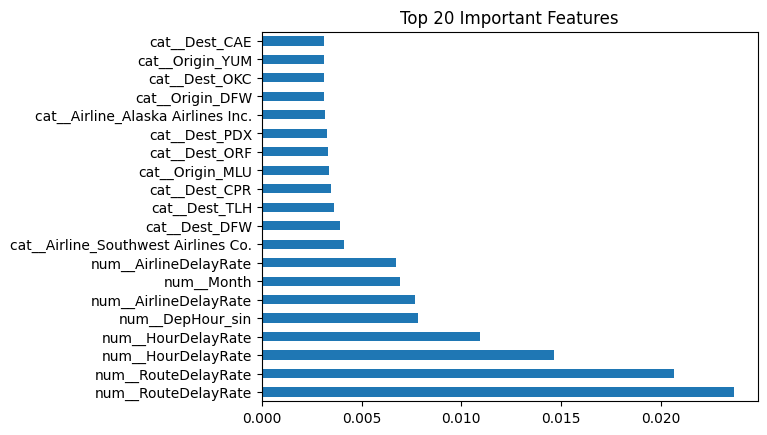

In [88]:
# Feature importance from XGBoost
feature_names = preprocessor.get_feature_names_out()

importance = best_xgb.feature_importances_

feat_imp = pd.Series(importance, index=feature_names)

feat_imp.nlargest(20).plot(kind="barh")
plt.title("Top 20 Important Features")
plt.show()

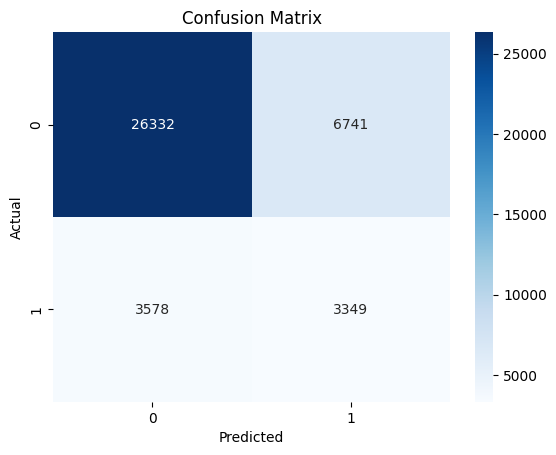

In [89]:
cm = confusion_matrix(y_test, final_preds)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Train on entire DS

In [18]:
df_departed["DepHour"] = df_departed["CRSDepTime"] // 100

df_departed["DepHour_sin"] = np.sin(2*np.pi*df_departed["DepHour"]/24)
df_departed["DepHour_cos"] = np.cos(2*np.pi*df_departed["DepHour"]/24)

In [22]:
categorical_cols = [
    "Airline",
    "Origin",
    "Dest"
]

numeric_cols = [
    "Month",
    "DayOfWeek",
    "Distance",
    "DistanceGroup",
    "DepHour",
    "DepHour_sin",
    "DepHour_cos"
]

features = categorical_cols + numeric_cols

X_full = df_departed[features]
y_full = df_departed["DepDel15"]


In [23]:

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full,
    y_full,
    test_size=0.1,
    stratify=y_full,
    random_state=42
)


In [24]:
train_temp = X_train_full.copy()
train_temp["DepDel15"] = y_train_full

# Airline delay rate
airline_delay_rate = train_temp.groupby("Airline")["DepDel15"].mean()

X_train_full["AirlineDelayRate"] = X_train_full["Airline"].map(airline_delay_rate)
X_test_full["AirlineDelayRate"] = X_test_full["Airline"].map(airline_delay_rate)

# Origin delay rate
origin_delay_rate = train_temp.groupby("Origin")["DepDel15"].mean()

X_train_full["OriginDelayRate"] = X_train_full["Origin"].map(origin_delay_rate)
X_test_full["OriginDelayRate"] = X_test_full["Origin"].map(origin_delay_rate)

# Route delay rate
train_temp["Route"] = train_temp["Origin"] + "_" + train_temp["Dest"]

X_train_full["Route"] = X_train_full["Origin"] + "_" + X_train_full["Dest"]
X_test_full["Route"] = X_test_full["Origin"] + "_" + X_test_full["Dest"]

route_delay_rate = train_temp.groupby("Route")["DepDel15"].mean()

X_train_full["RouteDelayRate"] = X_train_full["Route"].map(route_delay_rate)
X_test_full["RouteDelayRate"] = X_test_full["Route"].map(route_delay_rate)

# Hour delay rate
hour_delay_rate = train_temp.groupby("DepHour")["DepDel15"].mean()

X_train_full["HourDelayRate"] = X_train_full["DepHour"].map(hour_delay_rate)
X_test_full["HourDelayRate"] = X_test_full["DepHour"].map(hour_delay_rate)


In [25]:
global_mean = y_train_full.mean()

for col in ["AirlineDelayRate", "OriginDelayRate", "RouteDelayRate", "HourDelayRate"]:
    X_train_full[col] = X_train_full[col].fillna(global_mean)
    X_test_full[col] = X_test_full[col].fillna(global_mean)


In [26]:
X_train_full.drop(columns=["DepHour"], inplace=True)
X_test_full.drop(columns=["DepHour"], inplace=True)

numeric_cols.remove("DepHour")


In [27]:
numeric_cols.extend([
    "AirlineDelayRate",
    "OriginDelayRate",
    "RouteDelayRate",
    "HourDelayRate"
])


In [28]:

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)

X_train_encoded = preprocessor.fit_transform(X_train_full)
X_test_encoded = preprocessor.transform(X_test_full)


In [30]:
scale_pos_weight = (y_train_full == 0).sum() / (y_train_full == 1).sum()

final_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    tree_method="hist",
    n_jobs=-1,
    random_state=42
)

final_model.fit(X_train_encoded, y_train_full)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes f

In [31]:
pred = final_model.predict(X_test_encoded)

print(classification_report(y_test_full, pred))
print(confusion_matrix(y_test_full, pred))
print("Accuracy:", accuracy_score(y_test_full, pred))

              precision    recall  f1-score   support

         0.0       0.90      0.69      0.78    512919
         1.0       0.30      0.64      0.41    107427

    accuracy                           0.68    620346
   macro avg       0.60      0.67      0.60    620346
weighted avg       0.80      0.68      0.72    620346

[[355458 157461]
 [ 38764  68663]]
Accuracy: 0.6836845889229559


In [33]:
probs = final_model.predict_proba(X_test_encoded)[:, 1]

thresholds = np.arange(0.10, 0.90, 0.01)

best_threshold = 0.5
best_f1 = 0

results = []

for t in thresholds:
    
    preds = (probs >= t).astype(int)
    
    f1 = f1_score(y_test_full, preds)
    
    results.append((t, f1))
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print("Best threshold:", best_threshold)
print("Best F1 score:", best_f1)


Best threshold: 0.5499999999999998
Best F1 score: 0.4164842358671857


In [34]:
final_preds = (probs >= best_threshold).astype(int)

print(classification_report(y_test_full, final_preds))

print(confusion_matrix(y_test_full, final_preds))

print("Accuracy:", accuracy_score(y_test_full, final_preds))

              precision    recall  f1-score   support

         0.0       0.89      0.77      0.83    512919
         1.0       0.33      0.55      0.42    107427

    accuracy                           0.73    620346
   macro avg       0.61      0.66      0.62    620346
weighted avg       0.79      0.73      0.76    620346

[[395387 117532]
 [ 48260  59167]]
Accuracy: 0.7327426952055788


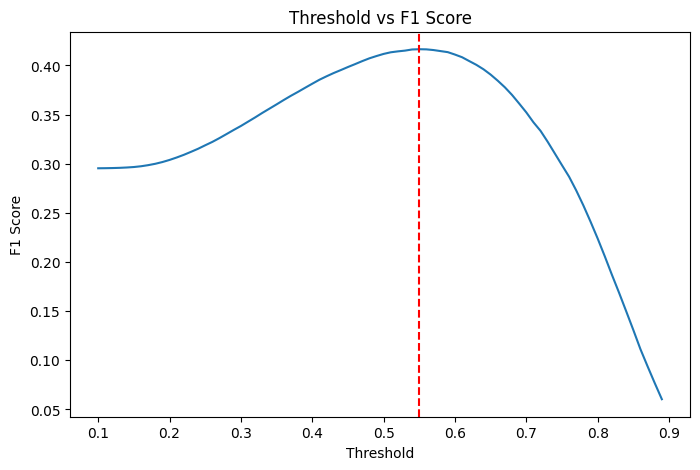

In [35]:
threshold_vals = [x[0] for x in results]
f1_vals = [x[1] for x in results]

plt.figure(figsize=(8,5))
plt.plot(threshold_vals, f1_vals)
plt.axvline(best_threshold, color='red', linestyle='--')
plt.title("Threshold vs F1 Score")
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.show()


In [37]:
joblib.dump(final_model, "flight_delay_model.pkl")
joblib.dump(preprocessor, "flight_delay_preprocessor.pkl")
joblib.dump(best_threshold, "flight_delay_threshold.pkl")

['flight_delay_threshold.pkl']

In [5]:
airlines = df_departed["Airline"].unique()

print(airlines)


<ArrowStringArray>
[                    'SkyWest Airlines Inc.',
                               'Horizon Air',
                     'United Air Lines Inc.',
 'Commutair Aka Champlain Enterprises, Inc.',
  'GoJet Airlines, LLC d/b/a United Express',
               'Air Wisconsin Airlines Corp',
                    'Southwest Airlines Co.',
                        'Mesa Airlines Inc.',
                         'Republic Airlines',
                          'Spirit Air Lines',
                      'Delta Air Lines Inc.',
                    'Frontier Airlines Inc.',
                             'Allegiant Air',
                    'Hawaiian Airlines Inc.',
                                 'Envoy Air',
                               'Comair Inc.',
                         'Endeavor Air Inc.',
                    'American Airlines Inc.',
               'Capital Cargo International',
                      'Alaska Airlines Inc.',
                           'JetBlue Airways',
               